In [1]:
from astropy import constants as const
print(const.R_sun.value)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Rsol = const.R_sun.value
Lsol = const.L_sun.value
Lzp = 3.0128e28
import matplotlib
sns.set_palette('colorblind',10)
sns.set_context('notebook')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 

695700000.0


Read in the target data

In [2]:
df = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')

Calculate V-band magnitudes

In [3]:
df['Vmag'] = df.Kmag + 2*((df.Jmag - df.Kmag) + 0.14) + 0.382 * np.exp(2*(df.Jmag - df.Kmag - 0.2))

Calculate the de-reddened V-Ks

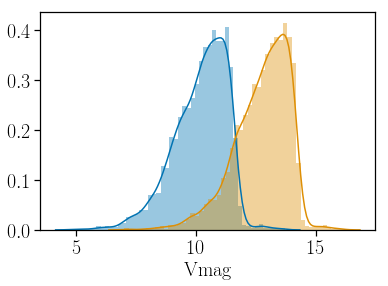

In [4]:
Kmag = df.Kmag
Vmag = df.Vmag
sns.distplot(Kmag)
sns.distplot(Vmag)

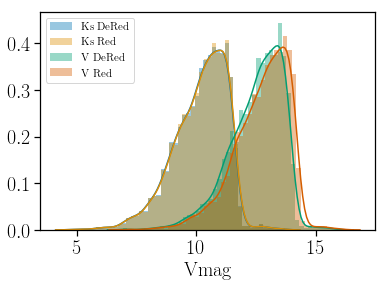

In [5]:
Aks = df.Aks.values
Av = 3.1 * df.Ebv.values
mK = Kmag - Aks
mV = Vmag - Av
VKs = mV - mK
sns.distplot(mK, label='Ks DeRed')
sns.distplot(Kmag, label='Ks Red')
sns.distplot(mV, label='V DeRed')
sns.distplot(Vmag, label='V Red')
plt.legend()

Calculate the Flower bolometric corrections

In [6]:
def get_flower(teff):
    lteff = np.log10(teff)
    BCv = np.full(len(lteff), np.nan)

    BCv[lteff<3.70] = (-0.190537291496456*10.0**5) + \
    (0.155144866764412*10.0**5*lteff[lteff<3.70]) + \
    (-0.421278819301717*10.0**4.0*lteff[lteff<3.70]**2.0) + \
    (0.381476328422343*10.0**3*lteff[lteff<3.70]**3.0)

    BCv[(3.70<lteff) & (lteff<3.90)] = (-0.370510203809015*10.0**5) + \
    (0.385672629965804*10.0**5*lteff[(3.70<lteff) & (lteff<3.90)]) + \
    (-0.150651486316025*10.0**5*lteff[(3.70<lteff) & (lteff<3.90)]**2.0) + \
    (0.261724637119416*10.0**4*lteff[(3.70<lteff) & (lteff<3.90)]**3.0) + \
    (-0.170623810323864*10.0**3*lteff[(3.70<lteff) & (lteff<3.90)]**4.0) \

    BCv[lteff>3.90] = (-0.118115450538963*10.0**6) + \
    (0.137145973583929*10.0**6*lteff[lteff > 3.90]) + \
    (-0.636233812100225*10.0**5*lteff[lteff > 3.90]**2.0) + \
    (0.147412923562646*10.0**5*lteff[lteff > 3.90]**3.0) + \
    (-0.170587278406872*10.0**4*lteff[lteff > 3.90]**4.0) + \
    (0.788731721804990*10.0**2*lteff[lteff > 3.90]**5.0)

    return BCv

In [7]:
BCv = get_flower(df.Teff)
BCk = mV - mK + BCv
casagrande = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/BCs/Logg_perturbed/casagrande_bcs_0.0.csv')
df = pd.merge(df, casagrande, on='KICID', how='left')
BCk_casagrande = df.BC_K.values

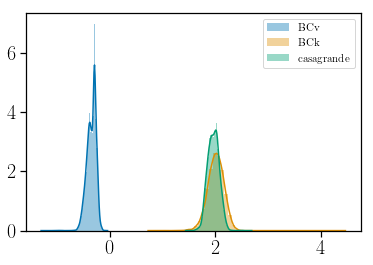

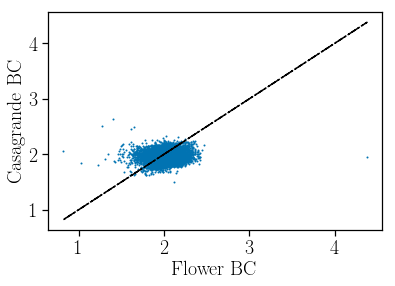

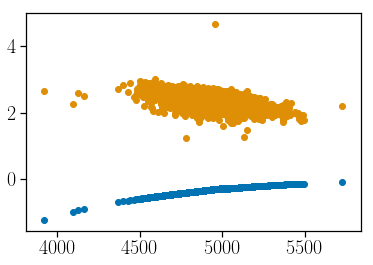

In [10]:
sns.distplot(BCv, label='BCv')
sns.distplot(BCk, label='BCk')
sns.distplot(BCk_casagrande, label='casagrande')
plt.legend()
plt.show()

plt.scatter(BCk, BCk_casagrande, s=1)
plt.xlabel('Flower BC')
plt.ylabel('Casagrande BC')
plt.plot(BCk, BCk, c='k', linestyle='-.')
plt.show()

plt.scatter(df.Teff, BCv)
plt.scatter(df.Teff, mV-mK)

# There seems to be zero correlation between the Flower values and the Casagrande values?

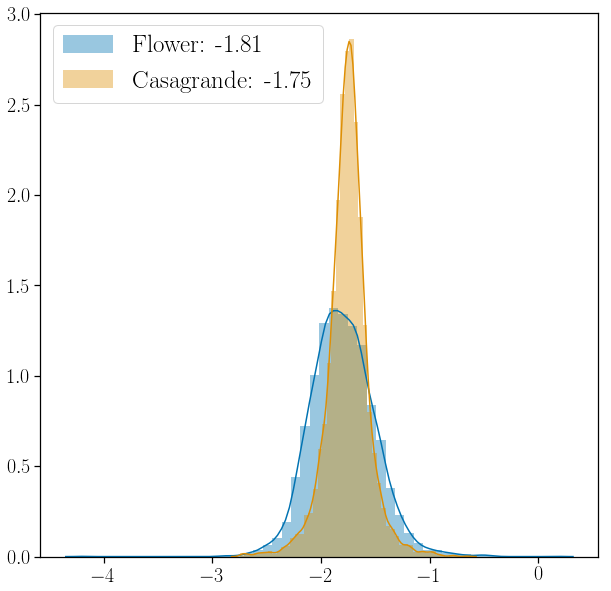

In [9]:
Mk = df.Mbol.values - BCk
Mk_casagrande = df.Mbol.values - BCk_casagrande
fig = plt.figure(figsize=(10,10))
sns.distplot(Mk, label='Flower: '+str(np.round(np.median(Mk),2)))
sns.distplot(Mk_casagrande, label='Casagrande: '+str(np.round(np.median(Mk_casagrande),2)))
plt.legend(fontsize=25)
